In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

In [2]:
base_ordinal = pd.read_csv('../Data/BaseOrdinal.csv')

In [3]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [7]:
Scores = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    RF_No_Bootstrap = RandomForestRegressor(n_estimators=100, criterion='squared_error', 
                                            bootstrap=False)
    RF_No_Bootstrap.fit(X_train_scaled, Y_train)
    RF_No_Bootstrap_Score = RF_No_Bootstrap.score(X_test_scaled, Y_test)
    
    Scores.append(RF_No_Bootstrap_Score)

In [8]:
Positive = []
Negative = []

for i in Scores:
    if i < 0:
        Negative.append(i)
    else:
        Positive.append(i)

Median R2 is: 0.79750877902407
Mean R2 is: 0.7908868447063221
Standard Deviation R2 is: 0.02925346343266603


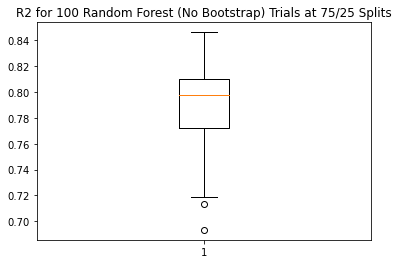

In [9]:
plt.boxplot(Positive)
plt.title('R2 for 100 Random Forest (No Bootstrap) Trials at 75/25 Splits')
print("Median R2 is: " + str(statistics.median(Positive)))
print("Mean R2 is: " + str(statistics.mean(Positive)))
print("Standard Deviation R2 is: " + str(statistics.stdev(Positive)))

In [10]:
print("Number of times results produced Negative R2: " + str((len(Negative))))

Number of times results produced Negative R2: 0


In [11]:
Negative

[]